In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

In [233]:
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

In [234]:
house_prices = pd.read_csv(path + '/Housing.csv')

In [235]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [236]:
house_prices.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [237]:
house_prices.mainroad.value_counts()

,count
mainroad,
yes,468
no,77


In [238]:
house_prices.mainroad.map({'yes':1, 'no': 0})

,mainroad
0,1
1,1
2,1
3,1
4,1
...,...
540,1
541,0
542,1
543,0


In [239]:
house_prices.mainroad = house_prices.mainroad.map({'yes':1, 'no': 0})

In [240]:
house_prices.guestroom = house_prices.guestroom.map({'yes':1, 'no': 0})

In [241]:
house_prices.basement = house_prices.basement.map({'yes':1, 'no': 0})

In [242]:
house_prices.hotwaterheating = house_prices.hotwaterheating.map({'yes':1, 'no': 0})

In [243]:
house_prices.airconditioning = house_prices.airconditioning.map({'yes':1, 'no': 0})

In [244]:
house_prices.prefarea = house_prices.prefarea.map({'yes':1, 'no': 0})

In [245]:
house_prices.furnishingstatus = house_prices.furnishingstatus.map({'unfurnished':1, 'semi-furnished': 2, 'furnished':3})

In [246]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


## Searching for outliers

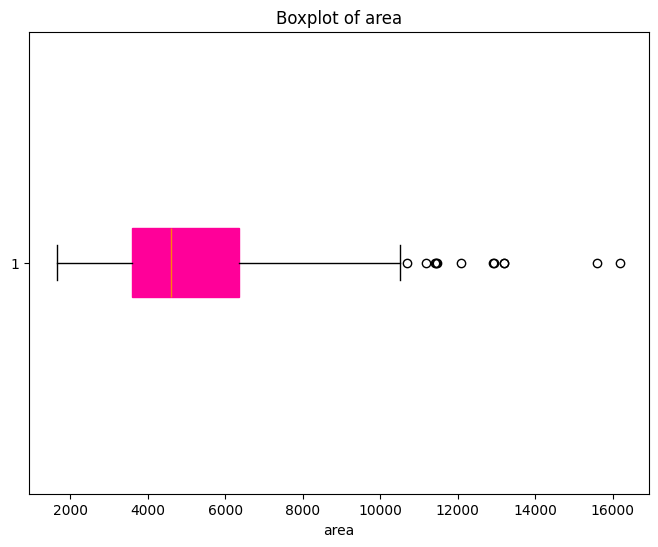

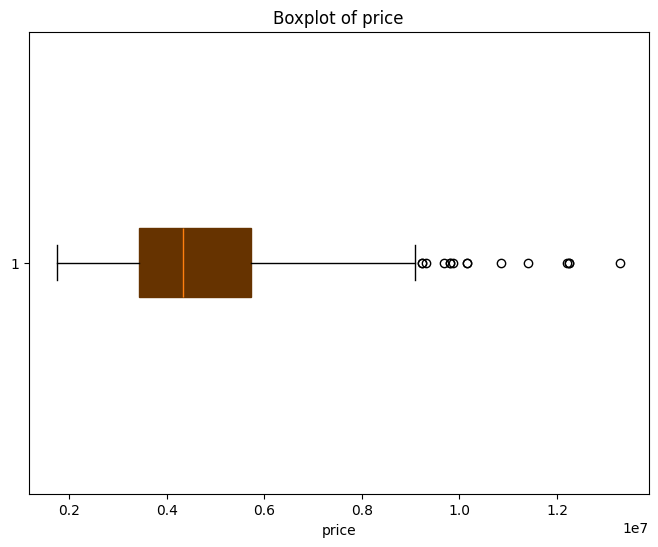

In [247]:
colors = ['#ff0099', '#663300']
check_outliers_columns = ['area', 'price']
for i, color in zip(check_outliers_columns, colors):
  plt.figure(figsize=(8, 6))
  plt.boxplot(house_prices[i], vert=False, patch_artist=True, boxprops=dict(facecolor=color, color=color))
  plt.title(f'Boxplot of {i}')
  plt.xlabel(i)
  plt.show()

## Check correlated columns

In [248]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


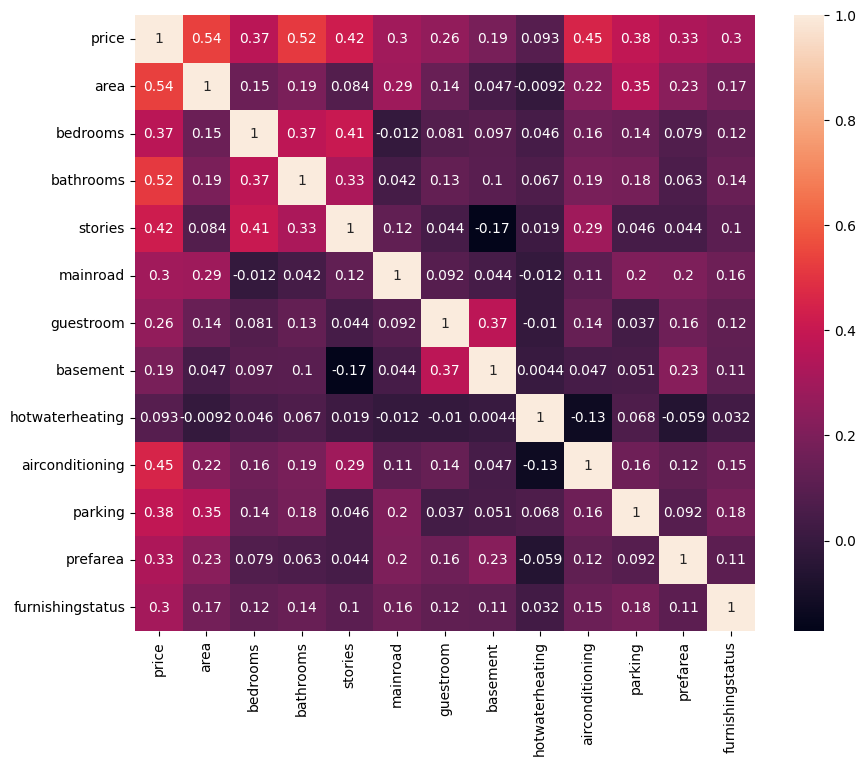

In [249]:
corr_matrix = house_prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

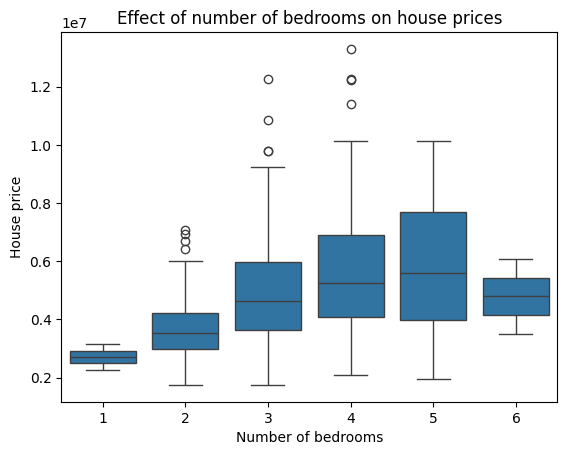

In [250]:
sns.boxplot(x='bedrooms', y='price', data=house_prices)
plt.title("Effect of number of bedrooms on house prices")
plt.xlabel('Number of bedrooms')
plt.ylabel('House price')
plt.show()

## Impartim setul de date

In [251]:
X = house_prices.drop(columns=['price'])
y = house_prices['price']

In [252]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,3
1,8960,4,4,4,1,0,0,0,1,3,0,3
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,3
4,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,3


In [253]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [254]:
from sklearn.model_selection import train_test_split, cross_val_score
## Impartim initial in set de antrenare + validare si set de testare
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
## Setul de antrenare + validare il impartim in antrenare si validare
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

* Cross validation
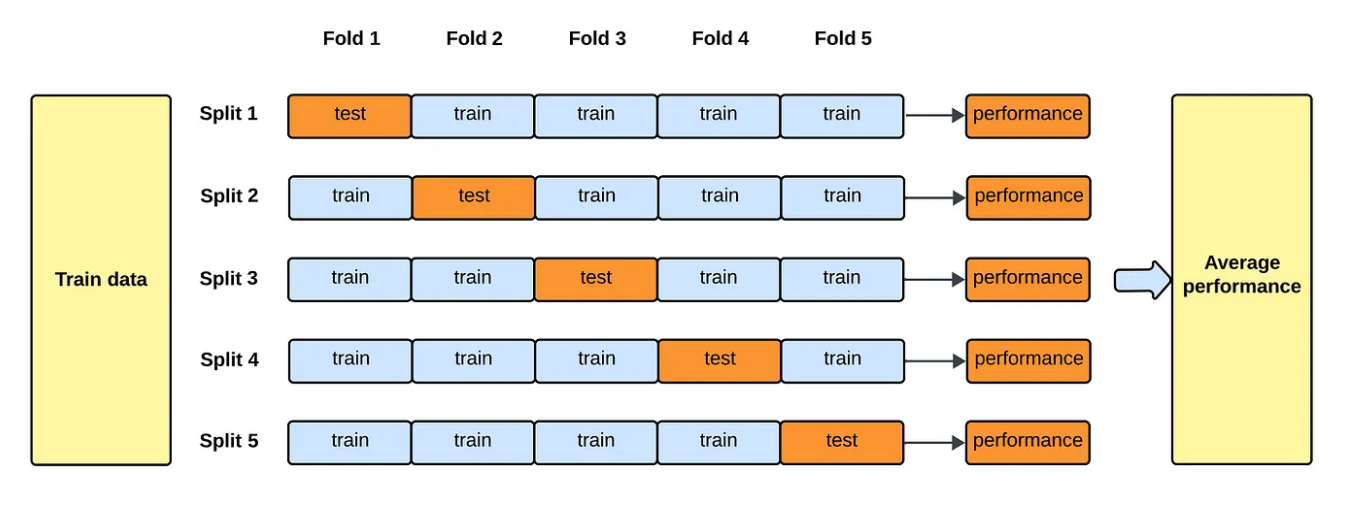

* Setul de date este impartit in k subseturi de dimensiuni aproximativ egale
* Modelul este antrenat pe k-1 fold-uri testat pe foldul ramas
* Se repeta pentru fiecare fold, astfel incat fiecare fold sa fie utilizat o data ca set de testare
* Performanta modelului este masurata pentru fiecare fold(MSE, Acuratete)
* Rezultatul final este media performantei obtinute pe toate fold-urile

In [305]:
from sklearn.model_selection import train_test_split, cross_val_score
## Impartim in set de antrenare si set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
## Optional
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [307]:
X_train_scaled

array([[ 0.38416819,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [ 0.9291807 ,  0.05527092,  1.53917323, ...,  2.70998729,
        -0.55262032,  0.07931697],
       [-0.60775457, -1.28351359, -0.5579503 , ...,  1.53897197,
        -0.55262032,  1.40940148],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.80305867,
        -0.55262032, -1.25076755],
       [ 0.15707965,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  0.07931697]])

In [308]:
y_train_scaled

array([[ 1.60509012],
       [ 0.90746568],
       [-0.44791897],
       [-0.72696874],
       [-0.96615427],
       [-0.04927642],
       [-1.68371084],
       [-0.96615427],
       [-1.24520405],
       [-0.56751173],
       [-0.57149815],
       [-1.2850683 ],
       [-0.28846195],
       [-0.60737598],
       [-0.60737598],
       [ 0.38524395],
       [-1.6739441 ],
       [ 0.30950186],
       [-0.68710449],
       [ 1.18651545],
       [-0.44791897],
       [-0.44791897],
       [ 0.6284159 ],
       [ 0.30950186],
       [ 0.7081444 ],
       [-0.68710449],
       [-1.30898685],
       [-1.16547554],
       [ 0.32943399],
       [-0.58744385],
       [-0.28846195],
       [-1.38472894],
       [-0.64724024],
       [-0.04927642],
       [-0.28846195],
       [-0.92230359],
       [-0.82662938],
       [ 2.36251095],
       [-0.60737598],
       [ 1.50144306],
       [-0.00941217],
       [-0.22866557],
       [-0.60737598],
       [-0.17285561],
       [-0.24859769],
       [-1

In [309]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cross_val_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=5, scoring='neg_mean_squared_error') ## CV cu 5 folduri
print(f"Cross-Validation MSE Scores: {-cross_val_scores}")
print(f" Mean Cross-Validation MSE: {np.mean(-cross_val_scores)}")

Cross-Validation MSE Scores: [0.35592027 0.30583024 0.20067847 0.44938423 0.41252626]
 Mean Cross-Validation MSE: 0.34486789300143345


In [310]:
model.fit(X_train_scaled, y_train_scaled)
## Am facut cross validation, nu mai avem nevoie de un set separat de validare.
## Se recomanda cross-validation si in partea de fine-tunning (alegerea hyper-parametrilor modelului)

LinearRegression()

## Testare Model

In [311]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,1
77,6500,3,2,3,1,0,0,0,1,0,1,3
360,4040,2,1,1,1,0,0,0,0,0,0,2
90,5000,3,1,2,1,0,0,0,1,0,0,2
493,3960,3,1,1,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,0,2
357,6930,4,1,2,0,0,0,0,0,1,0,3
39,6000,4,2,4,1,0,0,0,1,1,0,2
54,6000,3,2,2,1,1,0,0,1,1,0,2


In [312]:
X_test_scale = scaler_X.transform(X_test)
## Foarte important. Nu fac din nou fit transform pentru datele de test. Transformarile pe setul de test se fac dupa aceleasi reguli ca la cel de antrenare.

In [313]:
X_test_scale

array([[ 0.33875048,  1.39405543,  1.53917323, ...,  0.36795665,
        -0.55262032, -1.25076755],
       [ 0.61125674,  0.05527092,  1.53917323, ..., -0.80305867,
         1.80956067,  1.40940148],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.80305867,
        -0.55262032,  0.07931697],
       ...,
       [ 0.38416819,  1.39405543,  1.53917323, ...,  0.36795665,
        -0.55262032,  0.07931697],
       [ 0.38416819,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  0.07931697],
       [ 0.4295859 ,  0.05527092,  1.53917323, ...,  1.53897197,
         1.80956067,  1.40940148]])

In [315]:
y_pred = model.predict(X_test_scale)

In [316]:
y_pred

array([[ 0.28312979],
       [ 1.45246927],
       [-0.93606895],
       [-0.08367833],
       [-0.78224776],
       [-0.65118072],
       [ 0.53471571],
       [ 0.97237588],
       [-1.11090049],
       [-1.16038507],
       [ 2.7700377 ],
       [-1.07012508],
       [-0.86040792],
       [-0.77123857],
       [-0.56530239],
       [ 0.33859607],
       [-0.97872844],
       [ 0.05938204],
       [-0.18422734],
       [-0.67281476],
       [ 0.62059083],
       [ 0.64550098],
       [-1.10840439],
       [ 0.03192715],
       [ 0.28373574],
       [ 1.5997043 ],
       [-0.82681065],
       [ 0.30162267],
       [ 1.9772646 ],
       [-0.72459616],
       [ 0.98942749],
       [-0.77480313],
       [ 1.1593649 ],
       [-0.31412494],
       [-0.63633311],
       [ 0.61595884],
       [ 0.03521881],
       [-0.17929993],
       [-0.84789579],
       [-0.03891364],
       [-0.1049951 ],
       [-0.66359366],
       [ 1.4417242 ],
       [-0.39010686],
       [-0.57207973],
       [-0

In [317]:
y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


In [318]:
y_pred_scale = scaler_y.inverse_transform(y_pred)

In [320]:
y_pred_scale[0]

array([5203691.70963177])

In [321]:
y_test.iloc[:1]
## Acest model LinearRegression foloseste OLS, deci nu are acei parametri discutati la gradient descent: learning rate, epsilon etc

,price
316,4060000


## SGDRegressor

In [347]:
from sklearn.linear_model import SGDRegressor
grad_regressor = SGDRegressor(max_iter=200, learning_rate='constant', tol=1e-5, eta0=0.01)

In [348]:
grad_regressor.fit(X_train_scaled, y_train_scaled)

SGDRegressor(learning_rate='constant', max_iter=200, tol=1e-05)

In [339]:
y_pred_regressor = grad_regressor.predict(X_test_scale)

In [345]:
y_pred_regressor

array([[4956538.158183  , 6856416.00146529, 3261305.63656074,
        4431892.9457922 , 3498803.36425671, 3469596.22343916,
        5394908.37615477, 6712148.95185167, 3199940.80616452,
        2914866.09741891, 8531040.60574496, 2991521.10076701,
        3316771.48051299, 3626527.51767129, 3891910.80445606,
        5170085.26591016, 3187504.0414086 , 4543775.16232882,
        4406491.46473254, 3597883.49130806, 5466243.22683299,
        6319704.05772668, 2942579.93311242, 5287348.76436016,
        5177176.69238235, 7194439.12801845, 3968047.19532439,
        5641296.24522748, 7822597.19069075, 3610809.29258197,
        6517051.31297284, 3319646.8088029 , 6544505.75058712,
        3979661.25404649, 3411762.09426273, 5464316.83388028,
        5146479.88321773, 4485468.04073133, 3275211.60907015,
        4482912.26528412, 4321030.91168815, 3668882.16372381,
        6842678.12984295, 4008271.78749275, 3726676.03776749,
        4247859.09723001, 6066017.17255474, 3831901.96894567,
        

In [344]:
y_pred_regressor = scaler_y.inverse_transform(y_pred_regressor.reshape(1, -1))

In [350]:
y_pred_regressor[0][0]

np.float64(4956538.158182999)

In [353]:
y_test.iloc[:1]

,price
316,4060000


## Schimbare model la nivel de date

In [361]:
house_prices.area = np.round(np.log(house_prices.area * 0.092903), 3)

In [362]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,6.536,4,2,3,1,0,0,0,1,2,1,3
1,12250000,6.724,4,4,4,1,0,0,0,1,3,0,3
2,12250000,6.830,3,2,2,1,0,1,0,0,2,1,2
3,12215000,6.546,4,2,2,1,0,1,0,1,3,1,3
4,11410000,6.536,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,5.630,2,1,1,1,0,1,0,0,2,0,1
541,1767150,5.407,3,1,1,0,0,0,0,0,0,0,2
542,1750000,5.818,2,1,1,1,0,0,0,0,0,0,1
543,1750000,5.600,3,1,1,0,0,0,0,0,0,0,3


In [363]:
house_prices.price = np.log(house_prices.price)

In [364]:
X = house_prices.drop(columns=['price'])
y = house_prices['price']

In [365]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,6.536,4,2,3,1,0,0,0,1,2,1,3
1,16.321036,6.724,4,4,4,1,0,0,0,1,3,0,3
2,16.321036,6.830,3,2,2,1,0,1,0,0,2,1,2
3,16.318175,6.546,4,2,2,1,0,1,0,1,3,1,3
4,16.250001,6.536,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414347,5.630,2,1,1,1,0,1,0,0,2,0,1
541,14.384879,5.407,3,1,1,0,0,0,0,0,0,0,2
542,14.375126,5.818,2,1,1,1,0,0,0,0,0,0,1
543,14.375126,5.600,3,1,1,0,0,0,0,0,0,0,3


In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

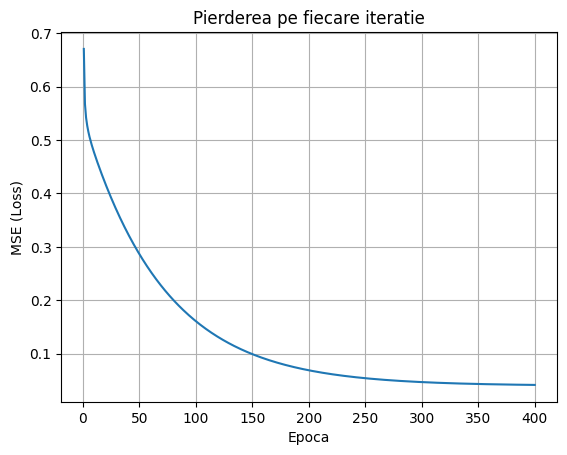

In [367]:
import warnings
warnings.filterwarnings("ignore")


grad_regressor_step = SGDRegressor(max_iter=1, warm_start=True, learning_rate='constant', tol=1e-3, eta0=0.005, penalty = None, random_state=42)
losses = []
## Iteram manual si calculam pierderea
for epoch in range(400):
  grad_regressor_step.fit(X_train, y_train)
  y_pred = grad_regressor_step.predict(X_train)
  loss = np.mean((y_pred - y_train)**2)
  losses.append(loss)


plt.plot(range(1, len(losses) + 1) , losses)
plt.title('Pierderea pe fiecare iteratie')
plt.xlabel('Epoca')
plt.ylabel('MSE (Loss)')
plt.grid()
plt.show()

In [368]:
X_test.iloc[:1]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,6.307,4,2,2,0,0,1,0,0,1,0,1


In [369]:
y_pred_test = grad_regressor_step.predict(X_test.iloc[:1])

In [370]:
y_pred_test

array([15.411917])

In [371]:
np.exp(y_pred_test)

array([4935265.38198506])

In [372]:
y_test.iloc[0]

np.float64(15.216693531577915)

In [373]:
np.exp(y_test.iloc[0])

np.float64(4059999.9999999995)